# Final Assignment A

Kamile Stankeviciute `ks830`

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import scipy
import math


import sklearn

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

import sklearn.linear_model
import scipy.optimize
import sklearn.decomposition
import sklearn.manifold
import sklearn.model_selection


import os
import pandas as pd
import numpy as np

import scipy
import math

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [2]:
sklearn.__version__

'0.22'

# Preprocessing

Note that the dataset contains a combination of *categorical- and numerical-valued* features. It also contains a number of *missing values*. 
Explore different features in the dataset (e.g., you might want to remove features with mostly missing values), gain insights from the data and report your findings.

Visualise the dataset and the predicted variable:
* `<30` if the patient was readmitted in less than 30 days
* `>30` if the patient was readmitted in more than 30 days
* `No` if there is no record for readmission (but absence of evidence is not evidence of absence ;))

Remove missing columns:
* 'weight': 97% missing
* 'payer_code': 52% missing, generally irrelevant
* 'medical_specialty': 53% missing, ??

In [2]:
# Loading the dataset
pd.set_option('display.max_columns', 500)

diabetic = pd.read_csv('training/diabetes/diabetic_data_balanced.csv')
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetic

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,94332918,94297905,Caucasian,Female,[50-60),NaN,2,1,1,3,MD,NaN,49,0,21,0,0,1,599,496,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
9995,94354164,7154802,AfricanAmerican,Male,[50-60),NaN,2,1,1,1,WC,Cardiology,43,2,7,0,0,0,427,426,726,5,None,None,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
9996,94367076,67099194,Caucasian,Male,[70-80),[50-75),1,3,5,4,MC,NaN,64,0,7,0,0,0,250.8,396,397,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
9997,94444062,60479757,Caucasian,Male,[60-70),NaN,6,1,17,1,NaN,Family/GeneralPractice,72,0,14,0,0,0,599,496,41,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30


In [5]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 50 columns):
encounter_id                9999 non-null int64
patient_nbr                 9999 non-null int64
race                        9819 non-null object
gender                      9999 non-null object
age                         9999 non-null object
weight                      300 non-null object
admission_type_id           9999 non-null int64
discharge_disposition_id    9999 non-null int64
admission_source_id         9999 non-null int64
time_in_hospital            9999 non-null int64
payer_code                  235 non-null object
medical_specialty           6362 non-null object
num_lab_procedures          9999 non-null int64
num_procedures              9999 non-null int64
num_medications             9999 non-null int64
number_outpatient           9999 non-null int64
number_emergency            9999 non-null int64
number_inpatient            9999 non-null int64
diag_1                   

## Missing value proportions

In [79]:
1 - diabetic.count()/len(diabetic)

race                        0.214016
gender                      0.196951
age                         0.196951
weight                      0.972304
admission_type_id           0.196951
discharge_disposition_id    0.196951
admission_source_id         0.196951
time_in_hospital            0.196951
payer_code                  1.000000
medical_specialty           0.494335
num_lab_procedures          0.196951
num_procedures              0.196951
num_medications             0.196951
number_outpatient           0.196951
number_emergency            0.196951
number_inpatient            0.196951
diag_1                      0.197370
diag_2                      0.201707
diag_3                      0.221430
number_diagnoses            0.196951
max_glu_serum               0.196951
A1Cresult                   0.196951
metformin                   0.196951
repaglinide                 0.196951
nateglinide                 0.196951
chlorpropamide              0.196951
glimepiride                 0.196951
a

## `medical_specialty` distributions

The dataset contains some patient-identifying information (patient number) which don't want any future machine learning models to use as an indicator for predicted variable. We observe that the dataset contains multiple encounters for the same patient: 

In [5]:
diabetic['patient_nbr'].value_counts()

1660293     15
3481272     12
3401055     12
23643405    11
633906      11
            ..
7067862      1
78346458     1
5812695      1
70858503     1
102402       1
Name: patient_nbr, Length: 7944, dtype: int64

In [6]:
diabetic_no_med_specialty = diabetic[diabetic['medical_specialty'].isnull()]
diabetic_no_med_specialty = diabetic_no_med_specialty.drop(['encounter_id', 'patient_nbr'], axis=1)
diabetic_no_med_specialty.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,2.179269,4.625241,6.767116,5.139951,46.248831,1.615892,16.687105,0.165796,0.092659,0.663459,7.108606
std,1.556872,5.681358,5.127842,3.298321,18.255429,1.813984,8.941903,0.803086,0.547465,1.348722,1.911987
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,3.000000,3.000000,34.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,2.000000,1.000000,7.000000,4.000000,47.000000,1.000000,15.000000,0.000000,0.000000,0.000000,7.000000
75%,3.000000,6.000000,7.000000,7.000000,59.000000,3.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,25.000000,20.000000,14.000000,108.000000,6.000000,62.000000,12.000000,22.000000,17.000000,9.000000


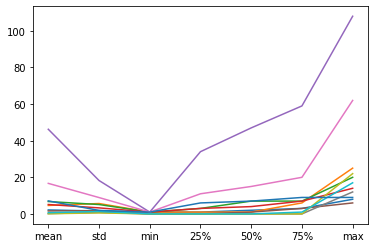

In [41]:
plt.plot(diabetic_no_med_specialty.describe().drop('count', axis=0))

In [45]:
diabetic_med_specialty = diabetic[diabetic['medical_specialty'].notnull()]
diabetic_med_specialty = diabetic_med_specialty.drop(['encounter_id', 'patient_nbr'], axis=1)
diabetic_med_specialty.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000
mean,2.613486,4.794719,6.696165,4.666929,47.225244,1.348318,14.513046,0.077020,0.049041,0.656712,6.768312
std,2.004497,7.351035,4.918415,3.076942,18.046814,1.663772,7.145152,0.418909,0.367843,1.352637,2.051931
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,36.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.000000
50%,2.000000,1.000000,7.000000,4.000000,48.000000,1.000000,13.000000,0.000000,0.000000,0.000000,7.000000
75%,5.000000,5.000000,7.000000,6.000000,60.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,25.000000,17.000000,14.000000,114.000000,6.000000,62.000000,7.000000,10.000000,15.000000,9.000000


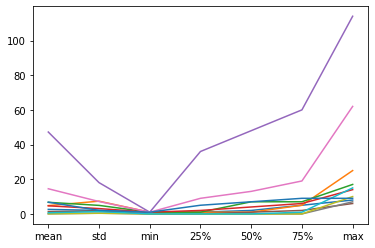

In [46]:
plt.plot(diabetic_med_specialty.describe().drop('count', axis=0))

## Anonymisation

In [5]:
diabetic = diabetic.groupby('patient_nbr', group_keys=False).apply(lambda df: df.sample(1))
diabetic

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4267,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,NaN,Cardiology,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
5827,29758806,378,Caucasian,Female,[50-60),NaN,3,1,1,2,NaN,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
2270,14824206,927,AfricanAmerican,Female,[30-40),NaN,1,1,7,5,NaN,InternalMedicine,49,0,5,0,0,0,590,220,250,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
5953,30180318,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,45,4,15,0,0,2,282,794,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
8926,70190028,1314,Caucasian,Female,[40-50),NaN,1,1,7,1,NaN,InternalMedicine,47,5,12,0,0,1,414,411,250.01,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,92021862,115036947,Caucasian,Male,[80-90),NaN,1,22,7,7,CP,Orthopedics-Reconstructive,47,1,22,0,0,0,820,E885,492,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
3112,19760178,115042869,Caucasian,Male,[60-70),NaN,1,1,7,2,NaN,NaN,61,4,11,0,0,0,414,440,437,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
2913,18658488,115066152,Caucasian,Female,[80-90),NaN,6,1,17,1,NaN,Cardiology,47,5,13,0,0,0,427,E878,287,7,None,None,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
5754,29467458,115187499,AfricanAmerican,Female,[40-50),NaN,1,1,7,2,NaN,NaN,53,0,12,0,0,0,493,250.03,401,5,None,None,No,No,No,No,No,No,Steady,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


In [8]:
diabetic_pre = diabetic.copy()

In [9]:
diabetic = diabetic_pre.copy()

## Splitting into train and test

In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(diabetic, diabetic['readmitted']):
    strat_train_set = diabetic.iloc[train_index]
    strat_test_set = diabetic.iloc[test_index]
    
diabetic_features = strat_train_set.drop("readmitted", axis=1)
diabetic_labels = strat_train_set["readmitted"].copy()

In [8]:
diabetic = diabetic_features

## Preprocessing pipeline

### Numerical and categorical features

In [123]:
list(diabetic.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [297]:
diabetic_num_features = [
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

diabetic_cat_features = [
 'race',
 'gender',
 'age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

# Data exploration

In [9]:
diabetic = strat_train_set

In [10]:
diabetic

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
6753,33264882,1620270,Caucasian,Male,[50-60),NaN,2,1,1,14,NaN,Family/GeneralPractice,54,4,21,0,0,0,250.7,403,V46,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
7611,38620758,2308932,AfricanAmerican,Female,[40-50),NaN,3,18,1,4,NaN,ObstetricsandGynecology,35,4,29,0,0,0,626,340,617,8,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
8584,63437190,20358054,Caucasian,Female,[60-70),NaN,3,18,5,1,NaN,NaN,53,0,13,0,0,0,707,280,780,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
8975,71262636,1050120,Caucasian,Female,[50-60),NaN,1,6,7,10,NaN,Nephrology,55,2,23,0,0,4,453,428,425,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
5750,29459682,453267,Other,Male,[50-60),NaN,3,1,1,9,NaN,Cardiology,79,6,30,0,0,0,414,250,305,4,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,36200298,100829583,Caucasian,Male,[80-90),NaN,6,6,4,8,NaN,NaN,24,2,11,0,0,3,276,787,715,7,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
2686,17262588,2064618,Caucasian,Female,[80-90),NaN,1,1,7,2,NaN,Family/GeneralPractice,70,0,9,0,0,0,428,401,V10,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
3061,19461750,487449,AfricanAmerican,Female,[10-20),NaN,2,1,1,3,NaN,Pediatrics-Endocrinology,5,0,5,0,0,0,250.02,465,V15,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
6678,32744148,26052840,Caucasian,Male,[80-90),NaN,5,1,17,1,NaN,NaN,27,0,12,0,0,0,530,496,786,8,Norm,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [286]:
diabetic_no_id = strat_train_set.drop(['encounter_id', 'patient_nbr'],axis=1)

In [ ]:
pairplot = sns.pairplot(diabetic_no_id.sort_values(['readmitted']), hue='readmitted', kind = 'scatter', diag_kind='hist', plot_kws = {'alpha':0.5})

In [299]:
pairplot.savefig("report/figures/pairplot_full.png", bbox_inches='tight', dpi=600)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

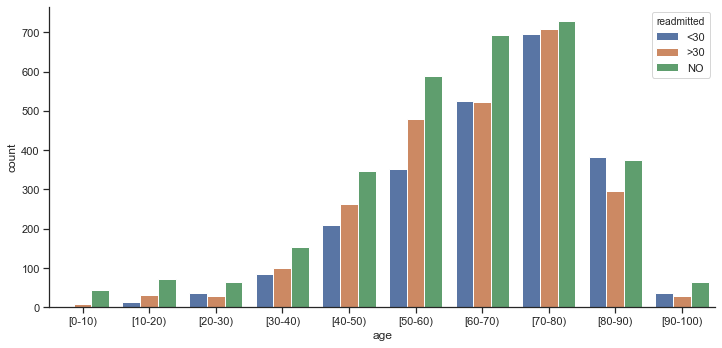

In [8]:
# fig, ax = plt.subplots(figsize=(8, 5))
p1 = sns.catplot(x="age", data=diabetic.sort_values(by=['age', 'readmitted']), hue='readmitted', kind='count', legend_out=False, aspect=2)
# p1.savefig("report/figures/age_count.png", bbox_inches='tight', dpi=600)

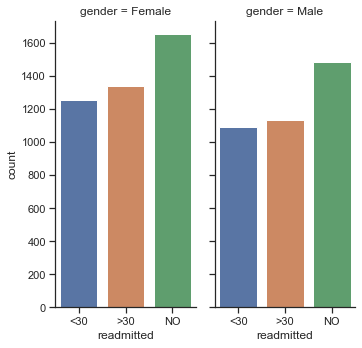

In [9]:
p2 = sns.catplot(x="readmitted", data=diabetic.sort_values(by=['readmitted']), col='gender', kind='count', legend_out=False, aspect=0.5)


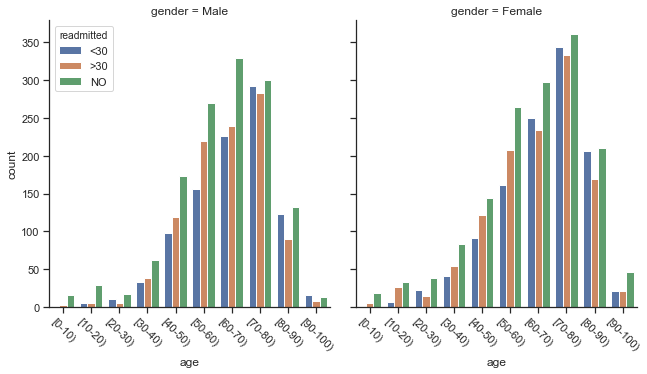

In [276]:
p4 = sns.catplot(x="age", data=diabetic.sort_values(by=['age', 'readmitted']), hue='readmitted', col='gender', kind='count', legend_out=False, aspect=0.9)
p4.set_xticklabels(rotation=-45)
p4.savefig("report/figures/gender_age_count_readmitted.png", bbox_inches='tight', dpi=600)

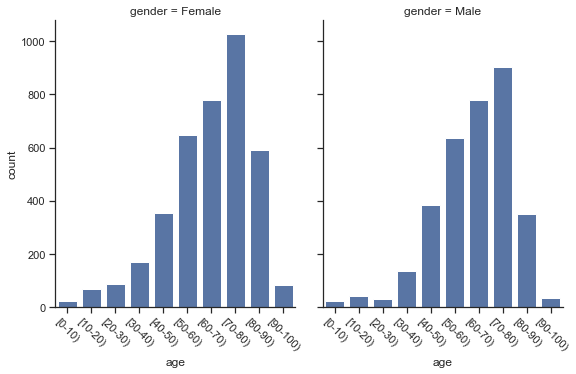

In [16]:
p5 = sns.catplot(x="age", data=diabetic.sort_values(by=['age', 'readmitted']), col='gender', kind='count', color='b', legend_out=False, aspect=0.8)
p5.set_xticklabels(rotation=-45)
# p5.savefig("report/figures/gender_age_count.png", bbox_inches='tight', dpi=600)

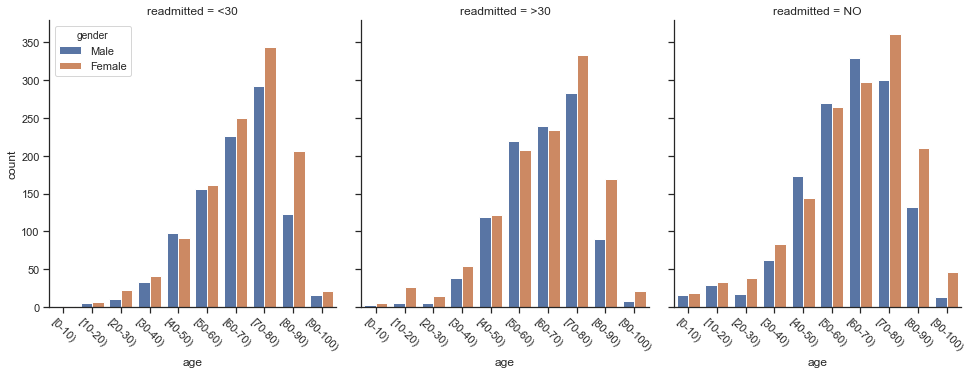

In [278]:
p6 = sns.catplot(x="age", data=diabetic.sort_values(by=['age', 'readmitted']), hue='gender', col='readmitted', kind='count', legend_out=False, aspect=0.9)
p6.set_xticklabels(rotation=-45)
p6.savefig("report/figures/readmitted_by_gender.png", bbox_inches='tight', dpi=600)

In [373]:
p7 = sns.hist(x='discharge_disposition_id', y='time_in_hospital', hue='readmitted', kind='violin', data=diabetic.sort_values(by=['readmitted']), aspect=5)

AttributeError: module 'seaborn' has no attribute 'hist'

In [316]:
p7.savefig("report/figures/disposition_time.png", bbox_inches='tight', dpi=600)

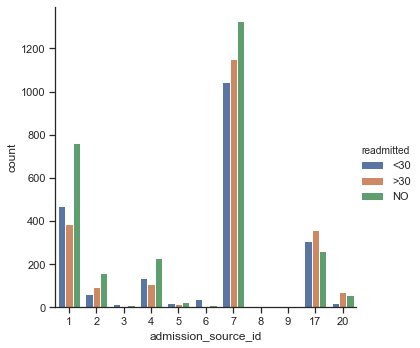

In [431]:
p8= sns.catplot(x='admission_source_id', kind='count', hue='readmitted', data=diabetic.sort_values(by=['readmitted']), aspect=1)

In [420]:
diabetic[diabetic['admission_source_id'].isnull()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


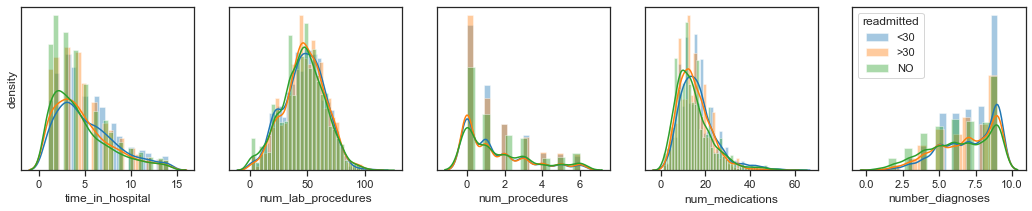

In [18]:
less = diabetic.loc[diabetic['readmitted'] == '<30']
more = diabetic.loc[diabetic['readmitted'] == '>30']
no = diabetic.loc[diabetic['readmitted'] == 'NO']
attrs = [
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses']
sns.set_palette("tab10")
fig, ax = plt.subplots(1, 5, figsize=(18, 3))
for i, attr in enumerate(attrs):
    p9 = sns.distplot(less[attr], ax=ax[i])
    p9 = sns.distplot(more[attr], ax=ax[i])
    p9 = sns.distplot(no[attr], ax=ax[i])

    if i==0:
        p9.set(ylabel='density')
    p9.set(xlabel=attr, yticks=[])
plt.legend(title='readmitted', loc='best', labels=['<30', '>30', 'NO'])

In [19]:
p9_fig = p9.get_figure()
p9_fig.savefig("kdeplots.png", bbox_inches='tight', dpi=600)

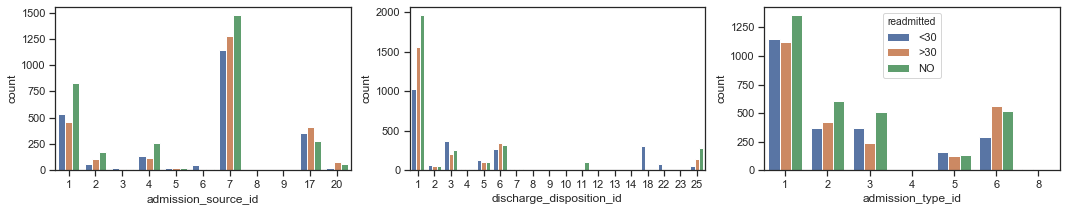

In [15]:
attrs = [
    'admission_source_id',
    'discharge_disposition_id',
    'admission_type_id']
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
for i, attr in enumerate(attrs):
    p9 = sns.catplot(x=attr, kind='count', hue='readmitted', data=diabetic.sort_values(by=['readmitted']), ax=ax[i], legend=False)
    ax[i].get_legend().set_visible(False)
    p9.set(xlabel=attr)
ax[2].get_legend().set_visible(True)
plt.close(2)
plt.close(3)
plt.close(4)


In [480]:
# p9_1_fig = p9.get_figure()
fig.savefig("report/figures/idplots.png", bbox_inches='tight', dpi=600)

NameError: name 'less' is not defined

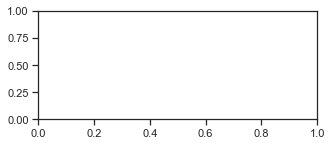

In [17]:
fig, ax = plt.subplots(figsize=(5, 2))
p10 = sns.kdeplot(less['max_glu_serum'], shade=True, shade_lowest=False, label='<30', ax=ax)
p10 = sns.kdeplot(more['max_glu_serum'], shade=True, shade_lowest=False, label='>30', ax=ax)
p10 = sns.kdeplot(no['max_glu_serum'], shade=True, shade_lowest=False, label='NO', ax=ax)
p10.set(xlabel='max_glu_serum', ylabel='density', yticks=[])

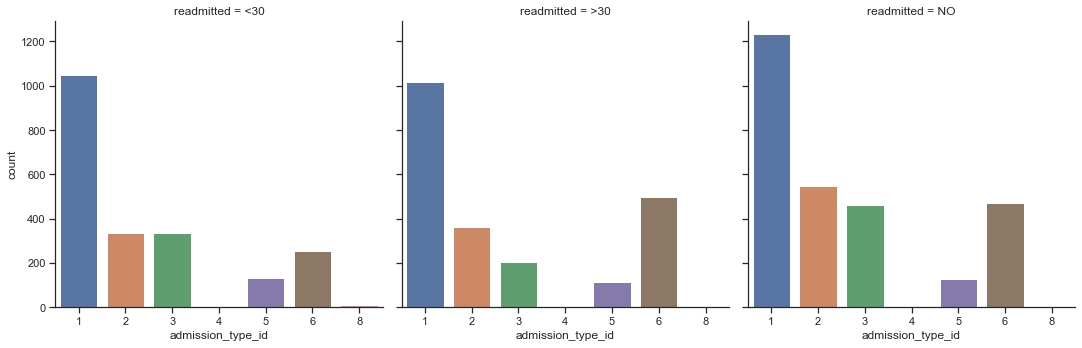

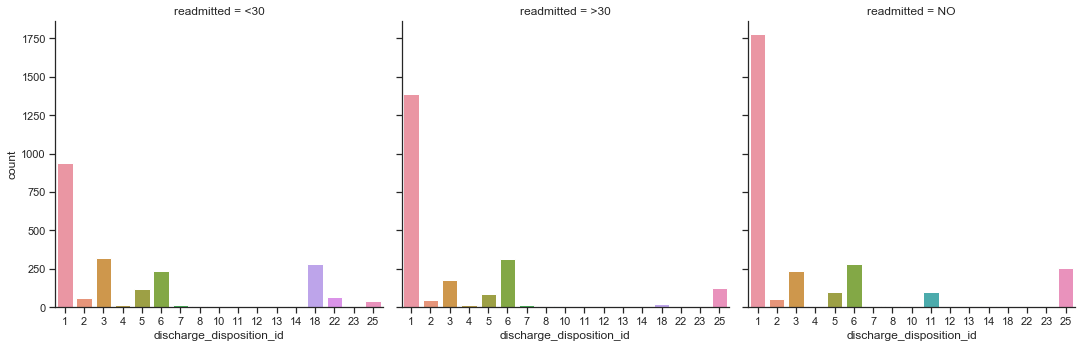

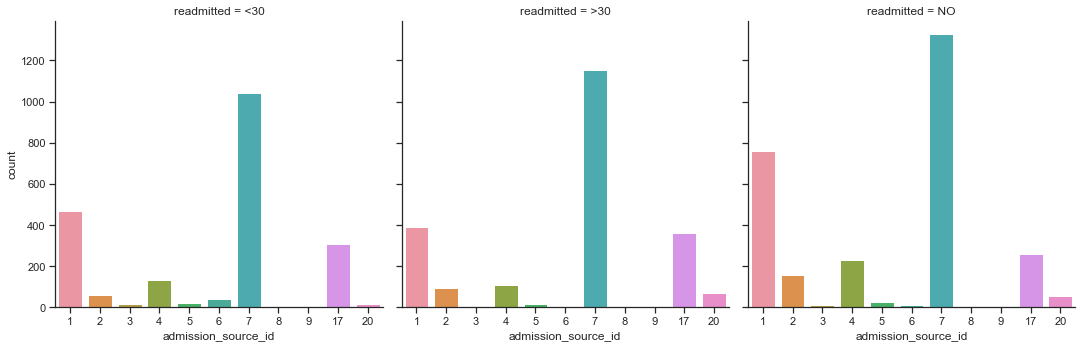

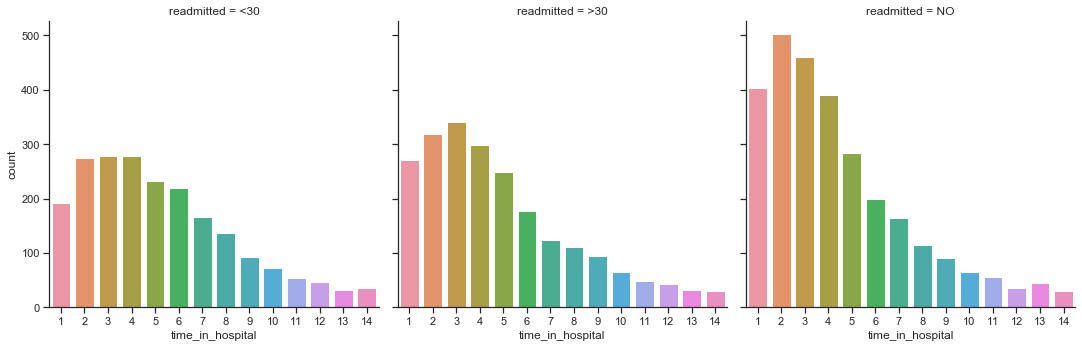

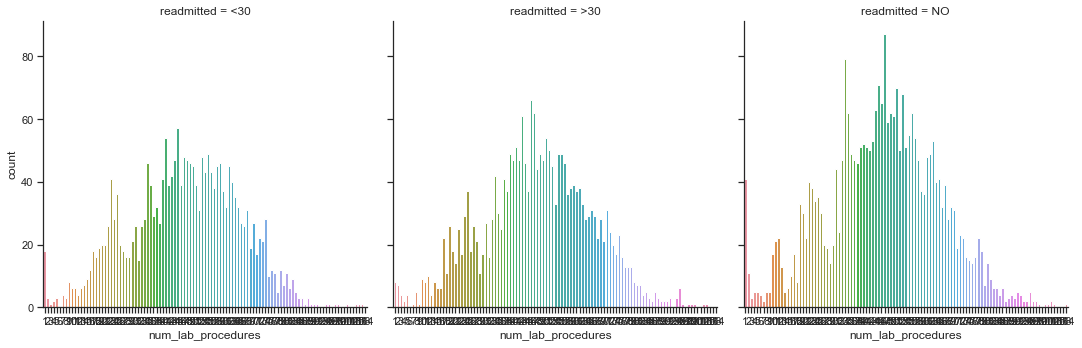

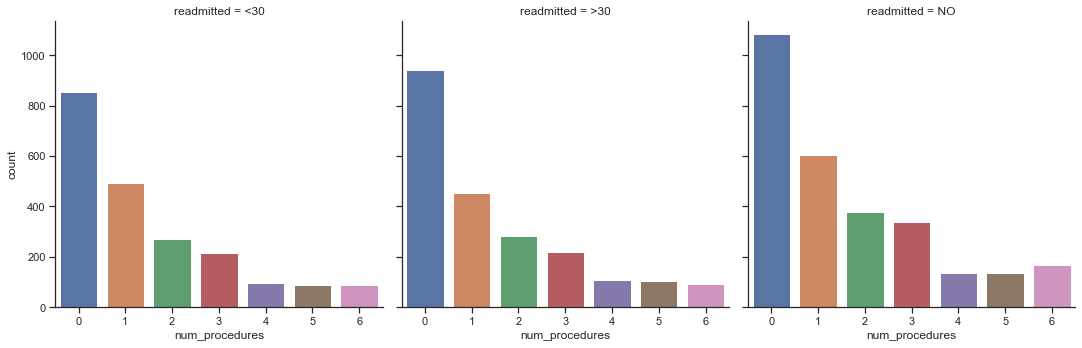

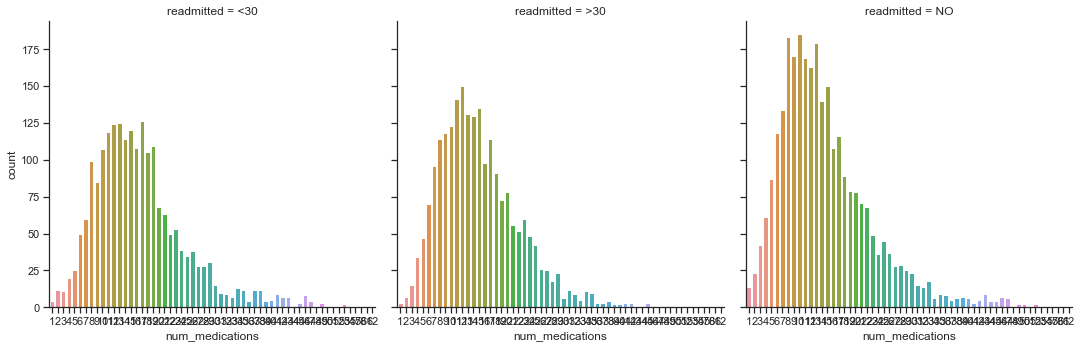

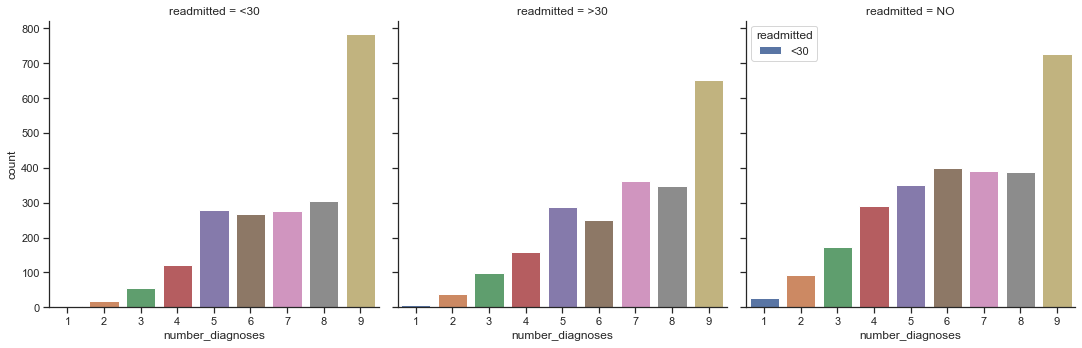

In [387]:
for i, attr in enumerate(attrs):
    p9 = sns.catplot(x=attr, kind='count', col='readmitted', data=diabetic.sort_values(by=['readmitted']), aspect=1)
plt.legend(title='readmitted', loc='best', labels=['<30', '>30', 'NO'])

In [388]:
diabetic['diabetesMed'].value_counts()

Yes    5414
No     1735
Name: diabetesMed, dtype: int64

In [390]:
diabetic['max_glu_serum'].value_counts()

None    6492
Norm     304
>200     197
>300     156
Name: max_glu_serum, dtype: int64

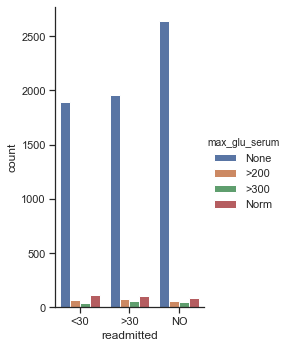

In [411]:
p10 = sns.catplot(x='readmitted', kind='count', hue='max_glu_serum', data=diabetic.sort_values(by=['readmitted', 'A1Cresult'], ascending=[True, False]), aspect=0.6)

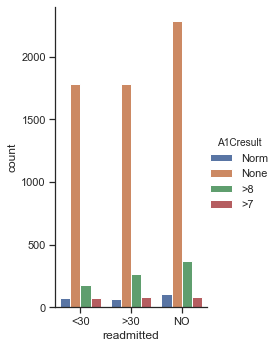

In [412]:
p11 = sns.catplot(x='readmitted', kind='count', hue='A1Cresult', data=diabetic.sort_values(by=['readmitted', 'A1Cresult'], ascending=[True, False]), aspect=0.6)

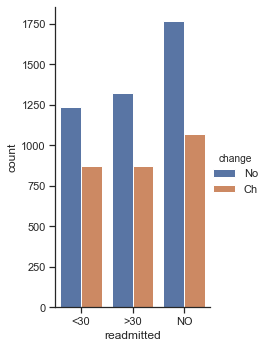

In [413]:
p12 = sns.catplot(x='readmitted', kind='count', hue='change', data=diabetic.sort_values(by=['readmitted', 'A1Cresult'], ascending=[True, False]), aspect=0.6)

In [12]:
diabetic_cp = diabetic.copy()
diabetic_cp

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
7242,36346398,1395522,Caucasian,Male,[50-60),NaN,1,1,7,9,NaN,InternalMedicine,53,0,16,0,0,2,435,250.02,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
8408,60023646,74892438,Caucasian,Female,[50-60),NaN,6,1,17,11,NaN,InternalMedicine,33,1,14,1,3,1,787,530,250.6,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
9342,78754080,57624300,Caucasian,Female,[70-80),NaN,2,1,1,3,NaN,NaN,43,1,15,0,0,0,490,403,250,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
8586,63522024,5389983,AfricanAmerican,Female,[50-60),NaN,3,18,1,7,NaN,NaN,45,5,43,0,0,2,414,394,710,9,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes
3255,20333592,5738940,AfricanAmerican,Male,[80-90),NaN,1,3,7,7,NaN,Family/GeneralPractice,45,2,18,0,0,0,285,562,428,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,11113800,3125853,Caucasian,Male,[80-90),NaN,1,1,7,6,NaN,InternalMedicine,55,0,13,0,0,0,599,162,197,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3490,21535044,25964343,Caucasian,Male,[70-80),NaN,5,6,17,5,NaN,Family/GeneralPractice,28,0,20,0,0,0,486,428,414,8,Norm,None,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes
5483,28449768,23886747,Caucasian,Female,[70-80),NaN,5,6,17,2,NaN,Family/GeneralPractice,19,0,8,1,0,0,250.8,496,780,5,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
3899,23050146,58302,AfricanAmerican,Female,[30-40),NaN,1,1,7,2,NaN,Pulmonology,57,0,7,0,0,0,250,493,401,4,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


In [26]:
encoder = OneHotEncoder(categories='auto')
admission_tid_cat_1hot = encoder.fit_transform(diabetic_cp["admission_type_id"].values.reshape(-1, 1))
print(admission_tid_cat_1hot.toarray().shape)

(7149, 7)


In [27]:
diabetic_cat_to_num_features = ['age', 'max_glu_serum', 'A1Cresult']

In [28]:
diabetic_cp[diabetic_cat_to_num_features]

,age,max_glu_serum,A1Cresult
7242,[50-60),None,None
8408,[50-60),None,None
9342,[70-80),None,None
8586,[50-60),None,None
3255,[80-90),None,None
...,...,...,...
1661,[80-90),None,None
3490,[70-80),Norm,None
5483,[70-80),>200,None
3899,[30-40),None,>8


In [29]:
diabetic_cp[diabetic_cat_to_num_features].sort_values(diabetic_cat_to_num_features)

,age,max_glu_serum,A1Cresult
2654,[0-10),None,>8
1574,[0-10),None,>8
4501,[0-10),None,>8
7537,[0-10),None,>8
4708,[0-10),None,>8
...,...,...,...
4679,[90-100),Norm,None
1585,[90-100),Norm,None
144,[90-100),Norm,None
4943,[90-100),Norm,None


In [30]:
class SortingDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names] \
            .sort_values(self.attribute_names).values

sdfs = SortingDataFrameSelector(['age'])
diab_age = sdfs.fit_transform(diabetic_cp)
diab_age

array([['[0-10)'],
       ['[0-10)'],
       ['[0-10)'],
       ...,
       ['[90-100)'],
       ['[90-100)'],
       ['[90-100)']], dtype=object)

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']])
diab_age = enc.fit_transform(diabetic_cp['age'].values.reshape(-1, 1))
diab_age

array([[5.],
       [5.],
       [7.],
       ...,
       [7.],
       [3.],
       [8.]])

In [45]:
enc.categories_

[array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
        '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)]

In [57]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Train test split
diabetic = diabetic_pre.copy()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(diabetic, diabetic['readmitted']):
    strat_train_set = diabetic.iloc[train_index]
    strat_test_set = diabetic.iloc[test_index]
    
diabetic_features = strat_train_set.drop("readmitted", axis=1)
diabetic_labels = strat_train_set["readmitted"].copy()

# Preprocessing pipeline
diabetic_num_to_cat_features = ['admission_type_id', 'discharge_disposition_id','admission_source_id']
diabetic_cat_to_num_features = ['max_glu_serum', 'A1Cresult']

diabetic_num_features = ['time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

diabetic_cat_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide','tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

diabetic_cat_features_no_drugs = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(diabetic_num_features)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

age_pipeline = Pipeline([
    ('selector', DataFrameSelector(['age'])),
    ('ordinal_encoder', OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']])),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(diabetic_num_to_cat_features + diabetic_cat_features_no_drugs + diabetic_cat_to_num_features)),
    ('imputer', SimpleImputer(strategy="constant")),
    ('encoder', OneHotEncoder(categories='auto'))

])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ('age_pipeline', age_pipeline),
    ("cat_pipeline", cat_pipeline),
])

diabetic_prepared = full_pipeline.fit_transform(diabetic_features)

In [58]:
diabetic_prepared.toarray().shape

(7149, 1338)

In [62]:
diabetic_prepared_df = pd.DataFrame(diabetic_prepared.toarray())

In [60]:
diabetic_prepared_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
0,1.342712,0.330026,-0.855623,0.084191,-0.179453,-0.153985,1.609986,1.088891,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [63]:
diabetic_features['diag_1'].value_counts()

414    748
428    529
410    324
786    300
486    187
      ... 
235      1
616      1
801      1
461      1
357      1
Name: diag_1, Length: 410, dtype: int64

In [64]:
diabetic_features['diag_1'].values

array(['435', '787', '490', ..., '250.8', '250', '290'], dtype=object)

In [107]:
diabetic_features = strat_train_set.drop("readmitted", axis=1)
diabetic_labels = strat_train_set["readmitted"].copy()

# PREPROCESSING PIPELINE
diabetic_num_to_cat_features = ['admission_type_id', 'discharge_disposition_id','admission_source_id']
diabetic_cat_to_num_features = []

# diabetic_num_features = ['time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

diabetic_num_features = ['time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 'number_diagnoses']

# diabetic_cat_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide','tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

diabetic_cat_features_no_drugs = ['gender','change', 'diabetesMed', 'max_glu_serum', 'A1Cresult']
diabetic_diag_features = ['diag_1', 'diag_2', 'diag_3']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(diabetic_num_features)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

age_pipeline = Pipeline([
    ('selector', DataFrameSelector(['age'])),
    ('ordinal_encoder', OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']])),
    ('std_scaler', StandardScaler()),
])

class DiagEncoder(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = OneHotEncoder(*args, **kwargs, categories='auto', sparse=False)
    def fit(self, X, y=0):
        X = [[self.get_type(icd_str) for icd_str in x] for x in X]
        self.encoder.fit(X)
        return self
    def transform(self, X, y=0):
        X = [[self.get_type(icd_str) for icd_str in x] for x in X]
        return self.encoder.transform(X)
    def get_type(self, icd_str):
        if isinstance(icd_str, float) and math.isnan(icd_str):
            return('missing')
        elif icd_str.isnumeric():
            icd = int(icd_str)
        elif icd_str[:3].isnumeric():
            icd = int(icd_str[:3])
        else:
            return 'other'

        if (icd >= 390 and icd <= 459 or icd == 785):
            return 'circulatory'
        elif (icd >= 520 and icd <= 579 or icd == 787):
            return 'digestive'
        elif (icd >= 580 and icd <= 629 or icd == 788):
            return 'genitourinary'
        elif (icd == 250):
            return 'diabetes'
        elif (icd >= 800 and icd <= 999):
            return 'injury'
        elif (icd >= 710 and icd <= 739):
            return 'musculoskeletal'
        elif (icd >= 140 and icd <= 239):
            return 'neoplasms'
        elif (icd >= 460 and icd <= 519 or icd == 786):
            return 'respiratory'
        else:
            return 'other'
        

diag_pipeline = Pipeline([
    ('selector', DataFrameSelector(diabetic_diag_features)),
    ('diag_encoder', DiagEncoder()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(diabetic_num_to_cat_features + diabetic_cat_features_no_drugs + diabetic_cat_to_num_features)),
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder(categories='auto', sparse=False))

])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ('age_pipeline', age_pipeline),
    ('diag_pipeline', diag_pipeline),
    ("cat_pipeline", cat_pipeline),
])

diabetic_prepared = full_pipeline.fit_transform(diabetic_features)
db_df = pd.DataFrame(diabetic_prepared)
db_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,1.342712,0.330026,-0.855623,0.084191,1.088891,-0.535074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.976313,-0.754062,-0.289300,-0.162633,1.088891,-0.535074,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.558090,-0.212018,-0.289300,-0.039221,-1.377362,0.661998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.709111,-0.103609,1.975989,3.416317,1.088891,-0.535074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.709111,-0.103609,0.277022,0.331015,0.102390,1.260533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7144,0.392311,0.438434,-0.855623,-0.286045,1.088891,1.260533,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7145,0.075511,-1.025083,-0.855623,0.577839,0.595640,0.661998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7146,-0.874890,-1.512923,-0.855623,-0.903106,-0.884111,0.661998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7147,-0.874890,0.546843,-0.855623,-1.026518,-1.377362,-1.732145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [109]:
cat_pipeline['encoder'].categories_

[array([1, 2, 3, 4, 5, 6, 8], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 22, 25],
       dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 20], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Ch', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['>200', '>300', 'None', 'Norm'], dtype=object),
 array(['>7', '>8', 'None', 'Norm'], dtype=object)]

In [126]:
diag_pipeline['diag_encoder'].encoder.categories_

[array(['circulatory', 'diabetes', 'digestive', 'genitourinary', 'injury',
        'missing', 'musculoskeletal', 'neoplasms', 'other', 'respiratory'],
       dtype=object),
 array(['circulatory', 'diabetes', 'digestive', 'genitourinary', 'injury',
        'missing', 'musculoskeletal', 'neoplasms', 'other', 'respiratory'],
       dtype=object),
 array(['circulatory', 'diabetes', 'digestive', 'genitourinary', 'injury',
        'missing', 'musculoskeletal', 'neoplasms', 'other', 'respiratory'],
       dtype=object)]

In [114]:
# MACHINE LEARNING ALGORITHMS
X_train = diabetic_prepared
print(X_train.shape)
y_train = diabetic_labels


# MULTI-CLASS CLASSIFIERS 
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
cv_sgd = cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy')
print(cv_sgd, np.mean(cv_sgd))

log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(X_train, y_train)
cv_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(cv_log_reg, np.mean(cv_log_reg))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
cv_gnb = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')
print(cv_gnb, np.mean(cv_gnb))

(7149, 85)
[0.48707198 0.46993007 0.49090909 0.47272727 0.49019608] 0.4821668979271642
[0.48707198 0.51748252 0.51748252 0.4951049  0.50280112] 0.5039886056312249
[0.37665968 0.39230769 0.36923077 0.39160839 0.37044818] 0.3800509421930066


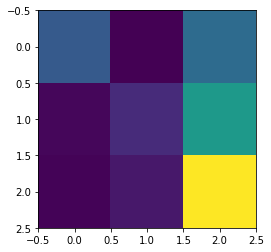

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

plt.imshow(confusion_matrix(y_train, cross_val_predict(sgd, X_train, y_train, cv=5)))

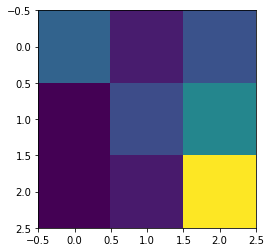

In [137]:
plt.imshow(confusion_matrix(y_train, cross_val_predict(log_reg, X_train, y_train, cv=5)))

In [139]:
diabetic_labels.value_counts()

NO     2824
>30    2199
<30    2126
Name: readmitted, dtype: int64

In [140]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier()
cv_baseline = cross_val_score(baseline, X_train, y_train, cv=5, scoring='accuracy')

In [148]:
mean_accuracies = {'Baseline': [np.mean(cv_baseline)], 'Naive Bayes': [np.mean(cv_gnb)], 'Logistic Regression': [np.mean(cv_log_reg)], 'SGDClassifier': [np.mean(cv_sgd)]}

In [178]:
df = pd.DataFrame(mean_accuracies)
df

,Baseline,Naive Bayes,Logistic Regression,SGDClassifier
0,0.341859,0.380051,0.503989,0.482167


[Text(0, 0.5, 'mean cv accuracy')]

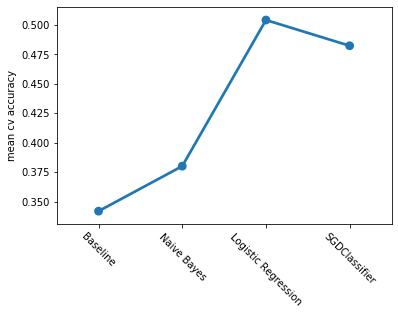

In [171]:
p15 = sns.pointplot(data=df)
p15.set_xticklabels(labels=p15.get_xticklabels(), rotation=-45)
p15.set(ylabel='mean cv accuracy')

In [176]:
p15_fig = p15.get_figure()
p15_fig.savefig('multiclass.png', bbox_inches='tight', dpi=600)

In [49]:
def get_type(icd_str):
    if isinstance(icd_str, float) and math.isnan(icd_str):
        return('missing')
    elif icd_str.isnumeric():
        icd = int(icd_str)
    elif icd_str[:3].isnumeric():
        icd = int(icd_str[:3])
    else:
        if icd_str[:3] == '250':
            print(icd_str)
        return 'other'

    if (icd >= 390 and icd <= 459 or icd == 785):
        return 'circulatory'
    elif (icd >= 520 and icd <= 579 or icd == 787):
        return 'digestive'
    elif (icd >= 580 and icd <= 629 or icd == 788):
        return 'genitourinary'
    elif (icd == 250):
        return 'diabetes'
    elif (icd >= 800 and icd <= 999):
        return 'injury'
    elif (icd >= 710 and icd <= 739):
        return 'musculoskeletal'
    elif (icd >= 140 and icd <= 239):
        return 'neoplasms'
    elif (icd >= 460 and icd <= 519 or icd == 786):
        return 'respiratory'
    else:
        if str(icd)[:3] == '250':
            print(icd)
        return 'other'

diabetic['diag_1_type'] = diabetic['diag_1'].apply(lambda i: get_type(i))
diabetic['diag_2_type'] = diabetic['diag_2'].apply(lambda i: get_type(i))
diabetic['diag_3_type'] = diabetic['diag_3'].apply(lambda i: get_type(i))

In [20]:
diabetic_diag = diabetic[['diag_1_type', 'diag_2_type', 'diag_3_type', 'readmitted']]

In [21]:
diabetic_diag

,diag_1_type,diag_2_type,diag_3_type,readmitted
4267,circulatory,injury,digestive,<30
5827,musculoskeletal,other,diabetes,NO
2270,genitourinary,neoplasms,diabetes,NO
5953,other,other,diabetes,>30
8926,circulatory,circulatory,diabetes,<30
...,...,...,...,...
9904,injury,other,respiratory,<30
3112,circulatory,circulatory,circulatory,NO
2913,circulatory,other,other,>30
5754,respiratory,diabetes,circulatory,>30


In [31]:
diabetic_diag.loc[(diabetic_diag['diag_1_type'] == 'circulatory') | (diabetic_diag['diag_2_type'] == 'circulatory') | (diabetic_diag['diag_3_type'] == 'circulatory')]

,diag_1_type,diag_2_type,diag_3_type,readmitted
4267,circulatory,injury,digestive,<30
8926,circulatory,circulatory,diabetes,<30
1083,other,circulatory,digestive,>30
2001,circulatory,other,diabetes,>30
2005,circulatory,circulatory,circulatory,NO
...,...,...,...,...
8323,respiratory,circulatory,circulatory,<30
3112,circulatory,circulatory,circulatory,NO
2913,circulatory,other,other,>30
5754,respiratory,diabetes,circulatory,>30


In [32]:
4951/len(diabetic_diag)

0.6232376636455186

In [53]:
len(diabetic_diag.loc[(diabetic_diag['diag_1_type'] == 'circulatory')])/4951

0.580286810745304

In [37]:
diabetic_diag.loc[(diabetic_diag['diag_1_type'] == 'respiratory') | (diabetic_diag['diag_2_type'] == 'respiratory') | (diabetic_diag['diag_3_type'] == 'respiratory')]

,diag_1_type,diag_2_type,diag_3_type,readmitted
265,respiratory,other,circulatory,NO
1914,respiratory,other,diabetes,NO
9498,respiratory,neoplasms,circulatory,<30
2819,circulatory,respiratory,circulatory,>30
419,circulatory,respiratory,circulatory,NO
...,...,...,...,...
7,circulatory,respiratory,diabetes,>30
8323,respiratory,circulatory,circulatory,<30
6220,other,respiratory,other,>30
9904,injury,other,respiratory,<30


In [38]:
1869/len(diabetic_diag)

0.23527190332326284

In [55]:
len(diabetic_diag.loc[(diabetic_diag['diag_1_type'] == 'respiratory')])/len(diabetic_diag)

0.11518126888217523

In [46]:
diabetic_diag.loc[(diabetic_diag['diag_1_type'] == 'diabetes') | (diabetic_diag['diag_2_type'] == 'diabetes') | (diabetic_diag['diag_3_type'] == 'diabetes')]

,diag_1_type,diag_2_type,diag_3_type,readmitted
5827,musculoskeletal,other,diabetes,NO
2270,genitourinary,neoplasms,diabetes,NO
5953,other,other,diabetes,>30
8926,circulatory,circulatory,diabetes,<30
2001,circulatory,other,diabetes,>30
...,...,...,...,...
7,circulatory,respiratory,diabetes,>30
6577,injury,other,diabetes,NO
593,other,other,diabetes,NO
5754,respiratory,diabetes,circulatory,>30


In [50]:
3676/len(diabetic_diag)

0.46273917421953675

In [22]:
diabetic_diag_1 = pd.melt(diabetic_diag, id_vars='readmitted', value_vars=['diag_1_type', 'diag_2_type', 'diag_3_type'])

In [23]:
diabetic_diag_1['diagnosis type'] = diabetic_diag_1['value']

In [24]:
diabetic_diag_1

,readmitted,variable,value,diagnosis type
0,<30,diag_1_type,circulatory,circulatory
1,NO,diag_1_type,musculoskeletal,musculoskeletal
2,NO,diag_1_type,genitourinary,genitourinary
3,>30,diag_1_type,other,other
4,<30,diag_1_type,circulatory,circulatory
...,...,...,...,...
23827,<30,diag_3_type,respiratory,respiratory
23828,NO,diag_3_type,circulatory,circulatory
23829,>30,diag_3_type,other,other
23830,>30,diag_3_type,circulatory,circulatory


In [26]:
diabetic_diag_1['diagnosis type'].value_counts()

circulatory        7957
other              5144
diabetes           3787
respiratory        2169
digestive          1203
genitourinary      1190
injury              827
musculoskeletal     669
neoplasms           626
missing             260
Name: diagnosis type, dtype: int64

In [17]:
p10 = sns.catplot(x='readmitted', kind='count', hue='diagnosis type',
                  data=diabetic_diag_1.sort_values(by=['readmitted']), aspect=1.5)
p10.set_xticklabels(rotation=-45)
axes = p10.axes.flatten()
for ax in axes:
    ax.set_xlabel("readmission outcome")
# p10_fig = p10.get_figure()
plt.savefig('diagtype.png', bbox_inches='tight', dpi=600)

NameError: name 'diabetic_diag_1' is not defined

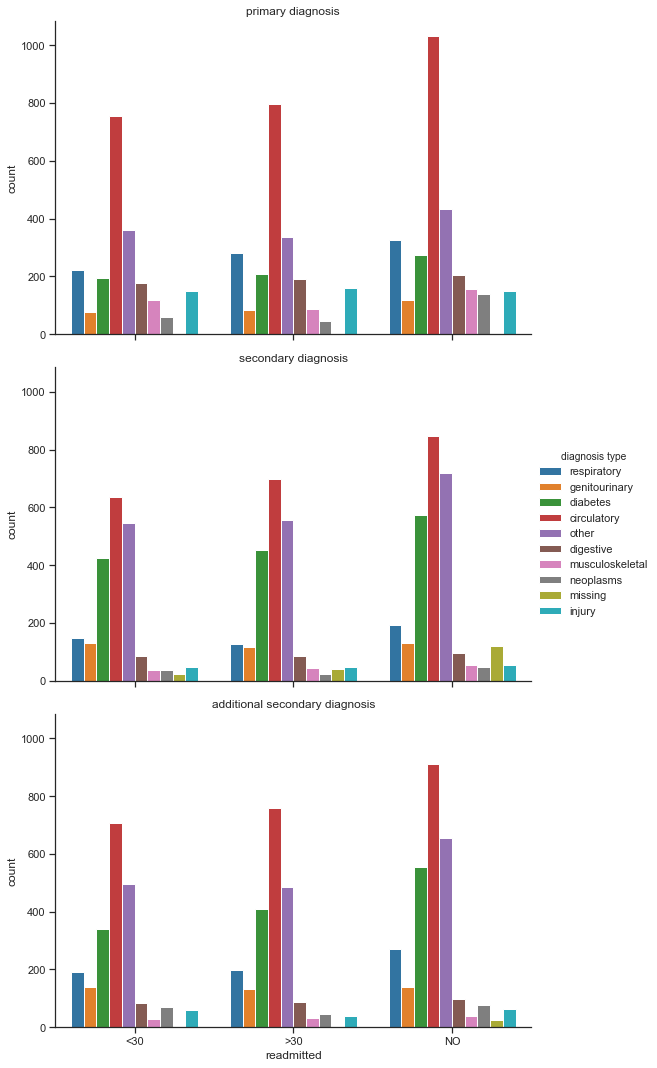

In [96]:
p12 = sns.catplot(x='readmitted', kind='count', hue='diagnosis type', row='variable',
                  data=diabetic_diag_1.sort_values(by=['readmitted']), aspect=1.5)
axes = p12.axes.flatten()

diags = ['primary diagnosis', 'secondary diagnosis', 'additional secondary diagnosis']
for i, ax in enumerate(axes):
    ax.set_title(diags[i])

plt.savefig('diagtypecount.png', bbox_inches='tight', dpi=600)

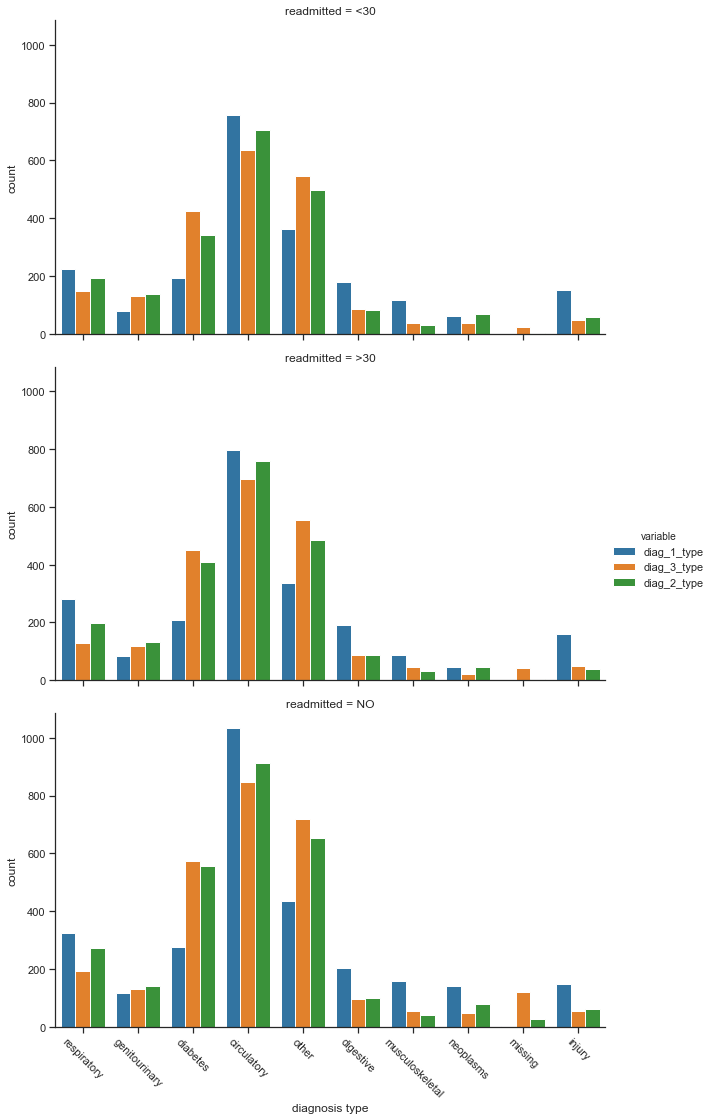

In [76]:
p11 = sns.catplot(x='diagnosis type', kind='count', hue='variable', row='readmitted',
                  data=diabetic_diag_1.sort_values(by=['readmitted']), aspect=1.7)
p11.set_xticklabels(plt.xticks()[1], rotation=-45)

In [78]:
diabetic.drop(['diag_1_type', 'diag_2_type', 'diag_3_type'], axis=1, inplace=True)

/Users/kamilestankeviciute/anaconda3/envs/datasci/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
diabetic

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
6753,33264882,1620270,Caucasian,Male,[50-60),NaN,2,1,1,14,NaN,Family/GeneralPractice,54,4,21,0,0,0,250.7,403,V46,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
7611,38620758,2308932,AfricanAmerican,Female,[40-50),NaN,3,18,1,4,NaN,ObstetricsandGynecology,35,4,29,0,0,0,626,340,617,8,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
8584,63437190,20358054,Caucasian,Female,[60-70),NaN,3,18,5,1,NaN,NaN,53,0,13,0,0,0,707,280,780,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
8975,71262636,1050120,Caucasian,Female,[50-60),NaN,1,6,7,10,NaN,Nephrology,55,2,23,0,0,4,453,428,425,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
5750,29459682,453267,Other,Male,[50-60),NaN,3,1,1,9,NaN,Cardiology,79,6,30,0,0,0,414,250,305,4,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,36200298,100829583,Caucasian,Male,[80-90),NaN,6,6,4,8,NaN,NaN,24,2,11,0,0,3,276,787,715,7,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
2686,17262588,2064618,Caucasian,Female,[80-90),NaN,1,1,7,2,NaN,Family/GeneralPractice,70,0,9,0,0,0,428,401,V10,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
3061,19461750,487449,AfricanAmerican,Female,[10-20),NaN,2,1,1,3,NaN,Pediatrics-Endocrinology,5,0,5,0,0,0,250.02,465,V15,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
6678,32744148,26052840,Caucasian,Male,[80-90),NaN,5,1,17,1,NaN,NaN,27,0,12,0,0,0,530,496,786,8,Norm,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


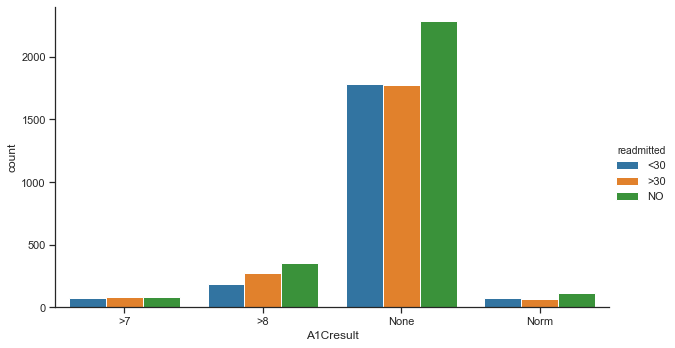

In [83]:
p12 = sns.catplot(x='A1Cresult', kind='count', hue='readmitted',
                  data=diabetic.sort_values(by=['A1Cresult', 'readmitted']), aspect=1.7)

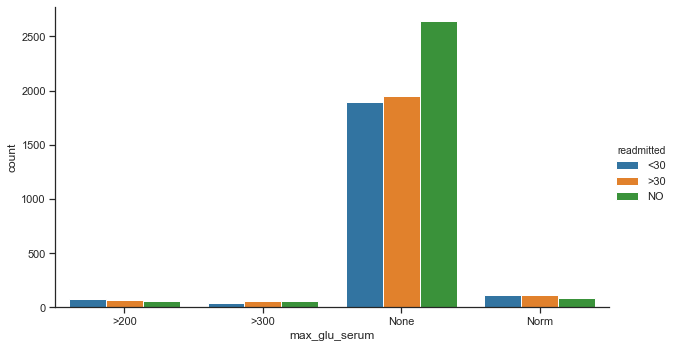

In [85]:
p13 = sns.catplot(x='max_glu_serum', kind='count', hue='readmitted',
                  data=diabetic.sort_values(by=['max_glu_serum', 'readmitted']), aspect=1.7)

In [57]:
len(diabetic.loc[(diabetic['max_glu_serum'] != 'None')])/len(diabetic)

0.09227089627391742

In [58]:
len(diabetic.loc[(diabetic['A1Cresult'] != 'None')])/len(diabetic)

0.18202416918429004

In [59]:
len(diabetic.loc[(diabetic['A1Cresult'] != 'None') & (diabetic['max_glu_serum'] != 'None')])/len(diabetic)

0.004028197381671702

In [60]:
0.004028197381671702 * 100

0.4028197381671702